# Thesis revisions
Last used: 23.04.23  
Last modified: 23.04.23  

In [780]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**This notebook serves to organize analyses for thesis revisions; these analyses don't fit neatly into the chapter-specific notebooks.**

In [465]:
import os, pdb
import scipy.stats as ss
import scipy.odr.odrpack as odrpack
from scipy.stats.mstats import gmean
from scipy.stats import ks_2samp, kstest, linregress
import itertools
import autoreload
from IPython.core.display import display, HTML, Image
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.backends.backend_pdf as pltSave
from matplotlib.ticker import FuncFormatter

import helper_fcns as hf
import helper_fcns_sfBB as hf_sf
import plot_sf_figs as psf
import numpy as np

import pandas as pd

from helper_fcns_sfBB import compute_f1f0 as bb_compute_f1f0
from helper_fcns_sfBB import get_resp_str

import warnings
warnings.filterwarnings(action='once')


base_dir = os.getcwd() + '/';

# what's the save name for this analysis?
saveName = 'figures/reports/ch00_thesis_revisions/'; # for one save name for all figures
save_loc = base_dir + saveName;

In [359]:
from matplotlib import rcParams

tex_width = 469; # per \layout in Overleaf on document
sns_offset = 2;

rcParams.update(mpl.rcParamsDefault)

fontsz = 12;
tick_scalar = 1.5;

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

params = {'text.usetex' : False,
          'font.size' : fontsz,
          'font.family': 'lmodern',
           'font.style': 'italic'}
plt.rcParams.update(params)

rcParams['lines.markeredgewidth'] = 0; # no edge, since weird tings happen then

tick_adj = ['xtick.major.size', 'xtick.minor.size', 'ytick.major.size', 'ytick.minor.size']
for adj in tick_adj:
    rcParams[adj] = rcParams[adj] * tick_scalar;

In [360]:
%matplotlib inline

## Table of contents
- Contrast, normalization, and d-DoG-S explanations: simple plots used in public talk
- Stimulus size in the experiments
- Temporal dynamics

### Simple functions

In [41]:
def inv_sig(x):
    return -np.log((1-x)/x);

# Contrast, normalization, and d-DoG-S explanations
This was used for the public talk of the defense, and should be here rather than in a chapter-specific notebook

*First plot: Luminance vs. dva; vary the additive term in the plotting line and change the save name to demonstrate varied phase*

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


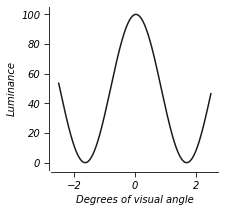

In [47]:
plt.figure(figsize=(3, 3))
plt.xlabel('Degrees of visual angle')
plt.ylabel('Luminance')

sf1 = .3
sf2 = 1
sf3 = 3
mean_lum = 50

xvals = np.linspace(-2.5, 2.5, 500)
plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf1 + 1.5), color='k')
sns.despine(offset=sns_offset)

saveName = "/000_sfExpl_ph3.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

*Vary the lines of this cell to demonstrate varying SF and/or contrast*

In [43]:
plt.figure(figsize=(3, 3))
plt.xlabel('Degrees of visual angle')
plt.ylabel('Luminance')

sf1 = .3
sf2 = 1
sf3 = 3
mean_lum = 50

xvals = np.linspace(-2.5, 2.5, 500)
plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf1), color='k', alpha=0.3)
# plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf2), color='k', alpha=0.3)
# plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf3), color='k')
plt.plot(xvals, mean_lum + .33*mean_lum*np.sin(2*np.pi*xvals*sf1), color='k')
sns.despine(offset=sns_offset)

saveName = "/000_sfExpl.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

*This plot demonstrates spatial frequency tuning with and without gain control*

In [ ]:
gain_control_on = 0 # or off [0]

plt.figure(figsize=(3, 3))
plt.xlabel('Spatial frequency (c/deg)')
plt.ylabel('Response (a.u.)')

sf_vals = np.geomspace(0.3, 10, 100)
resp = hf.get_descrResp([10, 0.1, 0.7, 3], sf_vals, DoGmodel=1)
resp /= np.max(resp)
resp = np.square(resp)

plt.semilogx(sf_vals, np.minimum(thresh, thresh*resp), color='k')
if gain_control_on:
    thresh = 0.5
    pw = 0.33

    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.66, pw)*thresh*resp), color='k', alpha=0.66)
    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.5, pw)*thresh*resp), color='k', alpha=0.5)
    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.33, pw)*thresh*resp), color='k', alpha=0.33)
    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.1, pw)*thresh*resp), color='k', alpha=0.1)
else:
    thresh = 0.5
    to_sub = 0.2 * np.max(resp)

    plt.semilogx(sf_vals, np.maximum(0, 0.66*resp - to_sub), color='k', alpha=0.66)
    plt.semilogx(sf_vals, np.maximum(0, 0.5*resp - to_sub), color='k', alpha=0.5)
    plt.semilogx(sf_vals, np.maximum(0, 0.33*resp - to_sub), color='k', alpha=0.33)
    plt.semilogx(sf_vals, np.maximum(0, 0.1*resp - to_sub), color='k', alpha=0.1)

sns.despine(offset=sns_offset)

saveName = "/0000_gainControl_%s.pdf" % ("on" if gain_control_on else "off")
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

*This plot shows the sharpening of SF tuning via the d-DoG-S model*

In [ ]:
normed = True;


f, ax = plt.subplots(1, 2, figsize=(10, 5))

ref_params_dog1 = [100, 0.1, inv_sig(0.7), 2];
ref_params_dog2 = [inv_sig(0.95), 2, inv_sig(0.7), 2]; # the center params (first two) are relative to dog1
ref_params_sep = [-np.inf, 0];

ref_params_all = np.hstack((ref_params_dog1, ref_params_dog2, ref_params_sep))
ref_params_dog1_only = np.hstack((ref_params_dog1, [-np.inf,1,0,0], ref_params_sep))
ref_params_dog2_only = np.hstack((np.hstack((ref_params_dog1[0]*hf.sigmoid(ref_params_dog2[0]), 
                                             ref_params_dog1[1]*ref_params_dog2[1],
                                             ref_params_dog2[2:], [-np.inf,1,0,0])), ref_params_sep))
# sf values
vals = np.geomspace(0.1, 8, 100);

del_linewidth = True;

# SPACE
space, samps, dc, df1, df2 = hf.parker_hawken(np.copy(ref_params_all), inSpace=True,
                                              debug=True, isMult=True, ref_params=None);

ax[0].plot(samps, space, 'k-')#, label='full');                                                                                                                                                                                                                                                                                           
# and plot the constitutent parts                                                                                                                                                                                                                                                                                                                               
ax[0].plot(samps, dc, 'k--')#, label='center');                                                                                                                                                                                                                                                                                           
# ax[0].plot(samps, df1, 'r--')#, label='f1');                                                                                                                                                                                                                                                                                              
ax[0].plot(samps, df2, 'k:')#, label='f2');  
ax[0].set_xlabel('Degrees of visual angle')
ax[0].set_ylabel('Sensitivity (a.u.)')


# FOURIER
prms_norm = np.copy(ref_params_all);
prms_norm[-1] = np.Inf; # biggest response when spacing is max
to_norm = np.nanmax(hf.parker_hawken(prms_norm, stim_sf=vals)) if normed else 1

ax[1].plot(vals, hf.parker_hawken(ref_params_all, stim_sf=vals)/to_norm, 'k-')
ax[1].plot(vals, hf.parker_hawken(ref_params_dog1_only, stim_sf=vals)/to_norm, 'k--')
ax[1].plot(vals, hf.parker_hawken(ref_params_dog2_only, stim_sf=vals)/to_norm, 'k:')
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].axis('equal')
ax[1].set_ylim([0.01, 1])

ax[1].set_xlabel('Spatial frequency (c/deg)')
ax[1].set_ylabel('Response (a.u.)')

from matplotlib.ticker import FuncFormatter
for i in range(2):
    for jj, axis in enumerate([ax[i].xaxis, ax[i].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x)) # this will make everything in non-scientific notation!                                                                                                                                                                                                                     
        if jj==1: # i.e. y axis, make sure we have tick labels, here, too                                                                                                                                                                                                                                                                                                 
            axis.set_tick_params(labelleft=True);


sns.despine(offset=5)
f.tight_layout()

saveName = "/0000_ddogs.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

# Stimulus size used

Per Hawk's comments, the text wasn't clear enough as to what stimulus size was used for the experiments. Here, I'll plot the distribution of stimulus sizes used in the experiments, split by LGN/V1 data.

*Note that we know Sach's experiments (34 LGN cells) used 8 degree patches for all cells.*

**NOTE: Jointlists created after 23.04.15 will have stimSize as metadata key!**

In [225]:
# Load jointLists
lgn_jointList = hf.np_smart_load('jointList_LGN_230415_vT00_dvT00_jt7.npy')
v1_jointList = hf.np_smart_load('jointList_wMods_V1_230415vE_vT00_dvT00_m3j10.npy')

# --- also add a better access to expDir to lgn, v1_jointList
nCells_lgn = len(lgn_jointList.keys())
lgn_expDirs = [lgn_jointList[x]["metadata"]["fullPath"].split('/')[-3] for x in range(nCells_lgn)]
nCells_v1 = len(v1_jointList.keys())
v1_expDirs = [v1_jointList[x]["metadata"]["fullPath"].split('/')[-3] for x in range(nCells_v1)]

stimSize_lgn = hf.jl_get_metric_byCon(lgn_jointList, ['stimSize'], conVal=None, disp=None, fieldOverwrite='metadata')[0]
stimSize_v1 = hf.jl_get_metric_byCon(v1_jointList, ['stimSize'], conVal=None, disp=None, fieldOverwrite='metadata')[0]

# And also get measured RF size...
rfsize_lgn = hf.jl_get_metric_byCon(lgn_jointList, ['rfsize', 'gsf_model'], conVal=None, disp=None, fieldOverwrite='basics')[0]
rfsize_v1 = hf.jl_get_metric_byCon(v1_jointList, ['rfsize', 'gsf_model'], conVal=None, disp=None, fieldOverwrite='basics')[0]
rfsize_data_lgn = hf.jl_get_metric_byCon(lgn_jointList, ['rfsize', 'gsf_data'], conVal=None, disp=None, fieldOverwrite='basics')[0]
rfsize_data_v1 = hf.jl_get_metric_byCon(v1_jointList, ['rfsize', 'gsf_data'], conVal=None, disp=None, fieldOverwrite='basics')[0]


### First, for all cells (none excluded)

##### LGN

In [219]:
# Now after this, round to nearest tenth...
stimSize_lgn = np.round(stimSize_lgn, 1)
# And get only non-Sach
stimSize_noSach = stimSize_lgn[~np.in1d(lgn_expDirs, 'sach')]

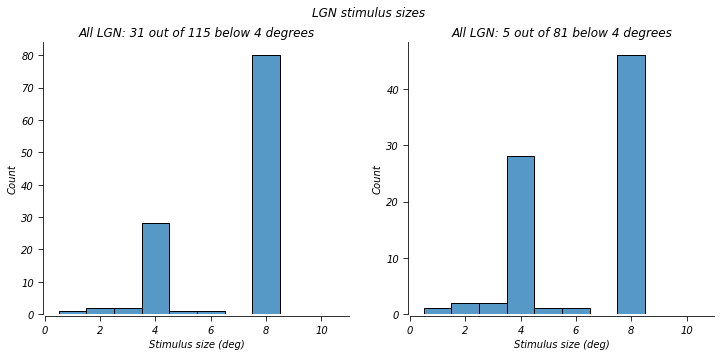

In [253]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
thresh = 4 # want to know how many cells below this size

# All data
ax[0].set_title(f"All LGN: {np.sum(stimSize_lgn<thresh)} out of {len(stimSize_lgn)} below {thresh} degrees")
sns.histplot(np.round(stimSize_lgn, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[0])
# No Sach
ax[1].set_title(f"All LGN: {np.sum(stimSize_noSach<thresh)} out of {len(stimSize_noSach)} below {thresh} degrees")
sns.histplot(np.round(stimSize_noSach, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[1])

for i in range(2):
    ax[i].set_xlabel("Stimulus size (deg)")

f.suptitle("LGN stimulus sizes")

sns.despine(offset=sns_offset)

saveName = "/01_stimSize_lgn.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

##### V1
Eeks...we used much smaller stimulus size than previously thought. Will need to comment on this in thesis, vis-a-vis resolving lower spatial frequencies.

In [221]:
# round to nearest tenth
stimSize_v1 = np.round(stimSize_v1, 1) # round to tenth

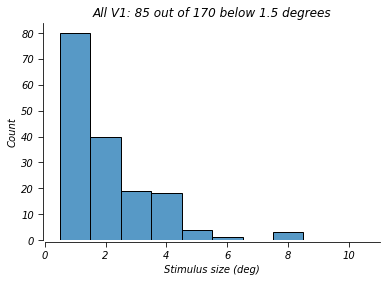

In [252]:
plt.figure()
thresh = 1.5 # want to know how many cells below this size

# All data
plt.title(f"All V1: {np.sum(stimSize_v1<thresh)} out of {len(stimSize_v1)} below {thresh} degrees")
sns.histplot(np.round(stimSize_v1, 3), bins=np.linspace(0.5, 10.5, 11))
plt.xlabel("Stimulus size (deg)")

sns.despine(offset=sns_offset)

saveName = "/01_stimSize_v1.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

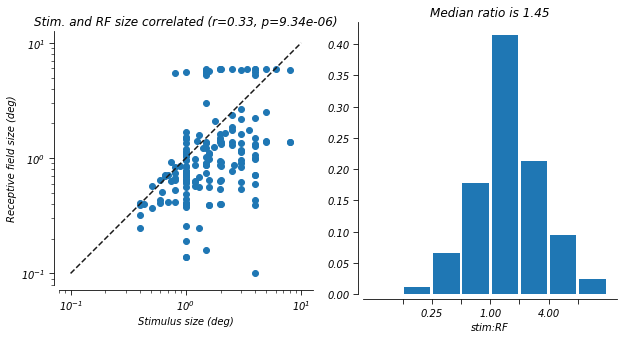

In [387]:
hist_width = 0.9
use_norm = True
halfsz = True

f, ax = plt.subplots(1, 2, figsize=(10,5))

rfsize_v1_clip = np.clip(rfsize_v1, 0.1, None)

# Scatter
plt.subplot(1,2,1)
plt.scatter(stimSize_v1, rfsize_v1_clip)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stimulus size (deg)")
plt.ylabel("Receptive field size (deg)")
plt.plot([0.1, 10], [0.1, 10], 'k--')
plt.axis("scaled");
rv, pv = ss.pearsonr(stimSize_v1[no_nan], rfsize_v1[no_nan])
plt.title(f"Stim. and RF size correlated (r={rv:.2f}, p={pv:.2e})")

# Ratio
plt.subplot(1,2,2)

bins = np.linspace(-4, 4, 9) # in log space
tickVals = np.linspace(bins[1], bins[-2], len(bins)-2)
stepSize = (bins[-1] - bins[0])/(len(bins)-1);
binPlotLocs = bins[1:] - 0.5*stepSize;
clipLow, clipHigh = bins[1]-0.5*stepSize, bins[-2]+0.5*stepSize;
width = hist_width*stepSize;

ratios = np.log2(stimSize_v1/rfsize_v1_clip)
clipped = np.clip(ratios, clipLow, clipHigh);
vals, _ = np.histogram(clipped, bins=bins)
vals_norm = vals/np.sum(vals)

to_use = vals_norm if use_norm else vals;
plt.bar(binPlotLocs, to_use, width=width, align='center')
plt.xlabel("stim:RF")
plt.title(f"Stim::RF size ratio")
tickStrs = ['%.2f' % np.power(2,x) for x in tickVals];
tickStrs[0] = '$>$%s' % tickStrs[0];
tickStrs[-1] = '$<$%s' % tickStrs[-1];
if halfsz: # take out every other...
    tickStrs = [str_val if np.mod(str_i,2)==1 else '' for str_i,str_val in enumerate(tickStrs)]
plt.xticks(ticks=tickVals, labels=tickStrs);
plt.title(f"Median ratio is {np.nanmedian(np.power(2,ratios)):.2f}")

sns.despine(offset=5)

saveName = "/01_stimSize_v1_wRFsize.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

### Then, with inclusion criteria

##### Chapter 1 inclusion

In [472]:
# Load jointLists
lgn_jointList = hf.np_smart_load('jointList_LGN_230415_vT00_dvT00_jt7.npy')
# NOTE THE DIFFERENT DATE
v1_jointList = hf.np_smart_load('jointList_wMods_V1_230420vE_vT00_dvT00_m3j10.npy')

In [473]:
joints = [lgn_jointList, v1_jointList]
whichAreas = ['LGN', 'V1']

### First, trim the non-included cells from the jointList
for ii, jointList in enumerate(joints):
    # Get the keys as ints for easy indexing
    keysAsInts = np.array([int(x) for x in jointList.keys()])

    prevCells = len(jointList)
    
    critA = np.where([len(np.where(~np.isnan(jointList[x]['metrics']['dog_varExpl'][0,-1]))[0]) > 0 for x in sorted(jointList.keys())])[0]

    jointListTrim = {key: jointList[keysAsInts[key]] for key in critA}
    joints[ii] = jointListTrim

    remCells = len(joints[ii])

    nCut = prevCells-remCells

    print('[%s] We cut %d cells (%.2f%% of the original %d)' % (whichAreas[ii], nCut, 100*nCut/prevCells, prevCells))

    # also get the keys as ints for easy indexing
    keysAsInts = np.array([int(x) for x in jointList.keys()])
    
### Then, let's also re-arrange into a pandas data frame
megas = [];

for jointList, whichArea in zip(joints, whichAreas):

    ohno = pd.DataFrame.from_dict(jointList) #, orient='index')

    meta = pd.json_normalize([ohno[x]['metadata'] for x in sorted(ohno.keys())])
    metr = pd.json_normalize([ohno[x]['metrics'] for x in sorted(ohno.keys())])
    modl = pd.json_normalize([ohno[x]['model'] for x in sorted(ohno.keys())])
    # supr = pd.json_normalize([ohno[x]['superpos'] for x in sorted(ohno.keys())])
    basc = pd.json_normalize([ohno[x]['basics'] for x in sorted(ohno.keys())])

    mega = pd.concat((meta, metr, modl, basc), axis=1);
    
    # First, classify as simple or complex [FOR USE WITH V1]
    simple = mega['f1f0_ratio'] > 1
    msk = np.copy(simple)
    simple[~msk] = 'complex'
    simple[msk] = 'simple'
    mega['simple'] = simple
    # Then, if LGN, group all of the others together, label new type as triType
    if whichArea == 'LGN':
        cellTypes = mega['cellType'];
        non_mp = np.logical_and(~(cellTypes=='parvo'), ~(cellTypes=='magno'))
        cellTypes[non_mp] = 'other'
        mega['triType'] = cellTypes;
        
    megas.append(mega);
    
# Finally, unpack the trimmed dataframes
lgn_jointList, v1_jointList = megas
# --- also add a better access to expDir to lgn, v1_jointList
lgn_jointList['expDir'] = lgn_jointList['fullPath'].apply(lambda x: x.split('/')[-3])
v1_jointList['expDir'] = v1_jointList['fullPath'].apply(lambda x: x.split('/')[-3])

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.


[LGN] We cut 7 cells (6.09% of the original 115)
[V1] We cut 26 cells (15.29% of the original 170)


/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##### LGN

In [756]:
# Now after this, round to nearest tenth...
stimSize_lgn = np.round(lgn_jointList["stimSize"], 1)
rfsize_lgn = np.round(lgn_jointList["rfsize.gsf_model"], 1)
# And get only non-Sach
stimSize_noSach = stimSize_lgn[~np.in1d(lgn_jointList["expDir"], 'sach')]
rfsize_noSach = rfsize_lgn[~np.in1d(lgn_jointList["expDir"], 'sach')]

fullMix = [len(lgn_jointList["val_con_by_disp"][x])>2 for x in range(len(lgn_jointList))]
stimSize_fullMix = stimSize_lgn[fullMix]
rfsize_fullMix = rfsize_lgn[fullMix]

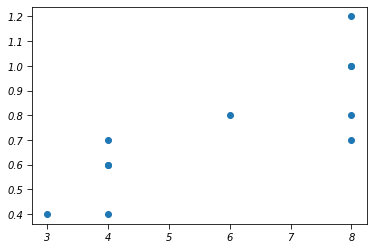

In [761]:
plt.scatter(stimSize_fullMix, rfsize_fullMix)

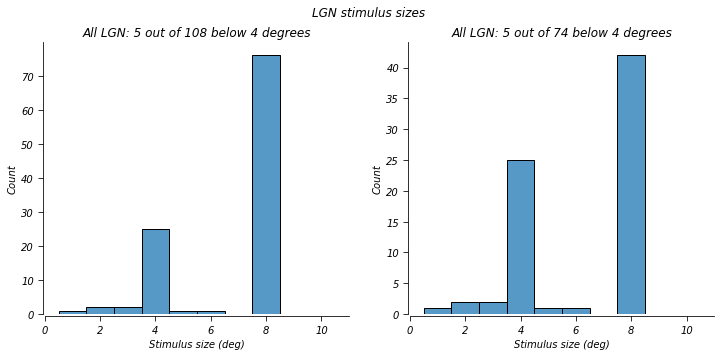

In [404]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
thresh = 4 # want to know how many cells below this size

# All data
ax[0].set_title(f"All LGN: {np.sum(stimSize_lgn<thresh)} out of {len(stimSize_lgn)} below {thresh} degrees")
sns.histplot(np.round(stimSize_lgn, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[0])
# No Sach
ax[1].set_title(f"All LGN: {np.sum(stimSize_noSach<thresh)} out of {len(stimSize_noSach)} below {thresh} degrees")
sns.histplot(np.round(stimSize_noSach, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[1])

for i in range(2):
    ax[i].set_xlabel("Stimulus size (deg)")

f.suptitle("LGN stimulus sizes")

sns.despine(offset=sns_offset)

saveName = "/01ch1_stimSize_lgn.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

##### V1

In [714]:
v1_jointList[["expDir", "cellNum", "stimSize", "rfsize.gsf_data", "rfsize.gsf_model"]].head()

,expDir,cellNum,stimSize,rfsize.gsf_data,rfsize.gsf_model
0,V1_orig,1,1.745910,1.596690,1.24
1,V1_orig,2,3.999170,3.999170,5.93
2,V1_orig,3,0.626736,0.626736,0.51
3,V1_orig,4,2.193580,1.596690,1.65
4,V1_orig,5,2.506940,2.521870,2.39


In [716]:
v1_jointList["expDir"].value_counts()

V1_orig    53
V1_BB      43
V1         41
altExp      7
Name: expDir, dtype: int64

In [719]:
v1_no_orig = v1_jointList[v1_jointList["expDir"]!="V1_orig"]

In [762]:
no_orig = True

if no_orig:
    v1_use = v1_no_orig
else:
    v1_use = v1_jointList

# Now after this, round to nearest tenth...
stimSize_v1 = np.round(v1_use["stimSize"], 1)
# rfsize_v1 = v1_jointList["rfsize.gsf_data"]
rfsize_v1 = v1_use["rfsize.gsf_model"]
no_nan = np.logical_and(~np.isnan(stimSize_v1), ~np.isnan(rfsize_v1))

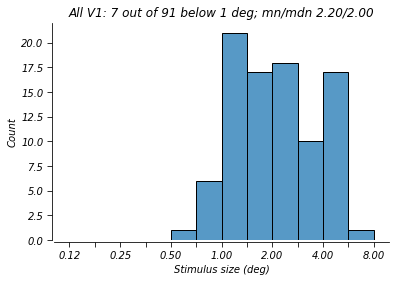

In [765]:
plt.figure()
thresh = 1 # want to know how many cells below this size

# All data
plt.title(f"All V1: {np.sum(stimSize_v1<thresh)} out of {len(stimSize_v1)} below {thresh} deg; mn/mdn {np.nanmean(stimSize_v1):.2f}/{np.nanmedian(stimSize_v1):.2f}")
bins = np.linspace(-3, 3, 13)
sns.histplot(np.log2(np.round(stimSize_v1, 3)), bins=bins)
plt.xlabel("Stimulus size (deg)")
tickStrs = ['%.2f' % np.power(2,x) for x in bins];
# if halfsz: # take out every other...
tickStrs = [str_val if np.mod(str_i,2)==0 else '' for str_i,str_val in enumerate(tickStrs)]
plt.xticks(ticks=bins, labels=tickStrs)


sns.despine(offset=sns_offset)

saveName = f"/01ch1_stimSize_v1{'_noOrig' if no_orig else ''}.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

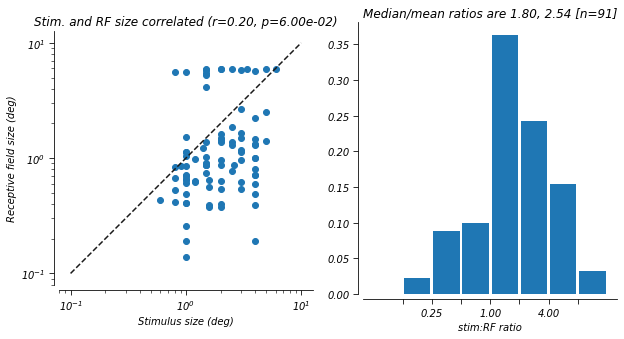

In [748]:
hist_width = 0.9
use_norm = True
halfsz = True

f, ax = plt.subplots(1, 2, figsize=(10,5))

rfsize_v1_clip = np.clip(rfsize_v1, 0.1, None)

# Scatter
plt.subplot(1,2,1)
plt.scatter(stimSize_v1, rfsize_v1_clip)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stimulus size (deg)")
plt.ylabel("Receptive field size (deg)")
plt.plot([0.1, 10], [0.1, 10], 'k--')
plt.axis("scaled");
rv, pv = ss.pearsonr(stimSize_v1[no_nan], rfsize_v1[no_nan])
plt.title(f"Stim. and RF size correlated (r={rv:.2f}, p={pv:.2e})")

# Ratio
plt.subplot(1,2,2)

bins = np.linspace(-4, 4, 9) # in log space
tickVals = np.linspace(bins[1], bins[-2], len(bins)-2)
stepSize = (bins[-1] - bins[0])/(len(bins)-1);
binPlotLocs = bins[1:] - 0.5*stepSize;
clipLow, clipHigh = bins[1]-0.5*stepSize, bins[-2]+0.5*stepSize;
width = hist_width*stepSize;

ratios = np.log2(stimSize_v1/rfsize_v1_clip)
clipped = np.clip(ratios, clipLow, clipHigh);
vals, _ = np.histogram(clipped, bins=bins)
vals_norm = vals/np.sum(vals)

to_use = vals_norm if use_norm else vals;
plt.bar(binPlotLocs, to_use, width=width, align='center')
plt.xlabel("stim:RF ratio")
tickStrs = ['%.2f' % np.power(2,x) for x in tickVals];
tickStrs[0] = '$>$%s' % tickStrs[0];
tickStrs[-1] = '$<$%s' % tickStrs[-1];
if halfsz: # take out every other...
    tickStrs = [str_val if np.mod(str_i,2)==1 else '' for str_i,str_val in enumerate(tickStrs)]
plt.xticks(ticks=tickVals, labels=tickStrs);
plt.title(f"Median/mean ratios are {np.nanmedian(np.power(2,ratios)):.2f}, {np.nanmean(np.power(2,ratios)):.2f} [n={len(ratios)}]")

sns.despine(offset=5)

saveName = f"/01ch1_stimSize_v1_wRFsize{'_noOrig' if no_orig else ''}.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

# Temporal dynamics
Per RK and MJH, I should look at the temporal dynamics of certain cells. Namely, do we see different effects early on vs. later in the response? This is motivated by the work of Bredfeldt + Ringach (2002) as well as Mazer et al (2002), among others, which show that early responses are unsuppressed and more LGN-like (i.e. lower spatial frequency tuning)

In [966]:
expDir = "V1_BB"
cellNum = 13
expDir = "altExp"
cellNum = 4

isBB = expDir=="V1_BB"

expStr = "_sfBB" if isBB else "_sfm"
curr_loc = np.where(np.logical_and(v1_jointList["cellNum"]==cellNum, v1_jointList["expDir"]==expDir))[0]

In [967]:
# get experiment name, load cell
curr_entry = v1_jointList.iloc[curr_loc]
expName = f"{curr_entry['expName'].values[0]}{expStr}.npy"
expInd = curr_entry["expInd"].values[0]
cell = hf.np_smart_load(curr_entry["fullPath"].values[0] + expName);
if isBB:
    tr_inf = cell['sfBB_core']
    nTrials = len(tr_inf["spikeCounts"]);
    time_scalar = 1e-4 # the spike times are in 1/10th ms, so multiply by 1e-4 to convert to S
else:
    tr_inf = cell['sfm']['exp']['trial']
    nTrials = len(tr_inf["num"]);
    time_scalar = 1 # already in s

stimDur = hf.get_exp_params(expInd, forceDir=expDir).stimDur;
spike_times = [time_scalar*tr_inf["spikeTimes"][x] for x in range(nTrials)]; 
psth, bins = hf.make_psth(spike_times, stimDur=stimDur);


if isBB:
    # NOTE: NOT CURRENTLY WORKING FOR NON-BB DATA
    counts, centers = hf.make_psth_slide(spike_times, stimDur=stimDur)


TypeError: 'float' object is not iterable

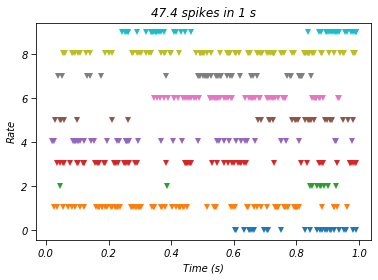

In [629]:
if isBB:
    trials = hf_sf.get_valid_trials(tr_inf, 1, 0, 3, 3) # tr_inf, maskON, baseON, conIND, sfIND
    
for trial_i, trial in enumerate(trials):
    only_spikes = np.where(psth[trial])[0]
    mdn = np.nanmedian(counts[trial])
    plt.plot(bins[trial][only_spikes], trial_i + mdn*psth[trial][only_spikes], 'v')
    if isBB:
        plt.plot(centers, trial_i + counts[trial])
        plt.plot(centers, counts[trial])
plt.title(f"{np.mean(tr_inf['spikeCounts'][trials])} spikes in {stimDur} s");
plt.xlabel("Time (s)");
plt.ylabel("Rate");

#### The next two notebook cells (early_times, late_times) demonstrate how we can analyze early/late response
Rather than re-doing our analyses to work with subsets of the stimulus duration, we'll just take the portion of the response we're interested in (*note: should be integer fraction of the total duration*) and replicate it to fill out that time:

- For example, if we want the first 200ms of a 1s stimulus presentation, simply "copy" the spikes in that window and shift them by 200, 400, 600, and 800ms
    - i.e. spikes at (0.03, 0.15, 0.19) become (0.23, 0.35, 0.39), then (0.43, 0.55, 0.59), and so on

In [1017]:
early_times = dict();

for tr_i, spikeTimes in enumerate(tr_inf["spikeTimes"]):
    hmm = np.array([])
    stim_dur = 1
    window_start = 0
    window_dur = 0.2
    frac = int(stim_dur/window_dur)
    msTenthToS = 1e4
    spikeTimes = np.array([spikeTimes]) if isinstance(spikeTimes, float) else spikeTimes

    ok_times = np.logical_and(spikeTimes>(window_start*msTenthToS), 
                              spikeTimes<((window_dur+window_start)*msTenthToS))

    for i in range(frac):
        hmm = np.concatenate((hmm, i*window*msTenthToS + spikeTimes[ok_times]))
    early_times[tr_i] = hmm

In [770]:
late_times = dict();

for tr_i, spikeTimes in enumerate(tr_inf["spikeTimes"]):
    hmm = np.array([])
    stim_dur = 1
    window_start = 0.75
    window_dur = 0.25
    frac = int(stim_dur/window_dur)
    msTenthToS = 1e4

    ok_times = np.logical_and(spikeTimes>(window_start*msTenthToS), 
                              spikeTimes<((window_dur+window_start)*msTenthToS))
    times_reset = spikeTimes[ok_times] - window_start*msTenthToS
    for i in range(frac):
        hmm = np.concatenate((hmm, i*window_dur*msTenthToS + times_reset))
    late_times[tr_i] = hmm

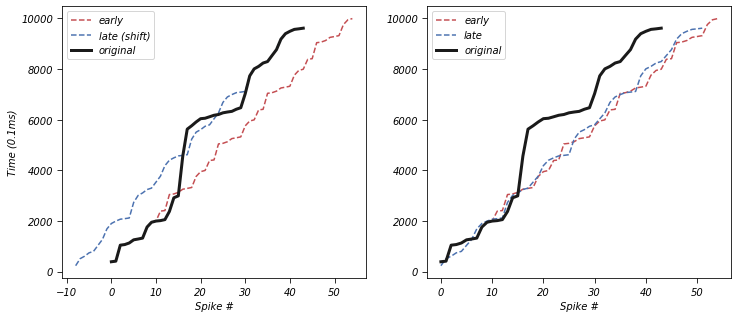

In [773]:
tr_i = 220

f, ax = plt.subplots(1, 2, figsize=(12,5))

for i in range(2):
    
    plt.subplot(1,2,i+1)
    plt.plot(early_times[tr_i], label="early", color='r', linestyle='--')
    orig_len = len(tr_inf["spikeTimes"][tr_i])
    late_len = len(late_times[tr_i])
    if i == 0: # shift to check alignment at end...
        lbl = "late (shift)"
        xvals = np.arange(late_len) - (late_len-orig_len)
    else:
        lbl = "late"
        xvals = np.arange(late_len)
    plt.plot(xvals, late_times[tr_i], label=lbl, color='b', linestyle='--')

    plt.plot(tr_inf["spikeTimes"][tr_i], label="original", color='k', linewidth=3)
    plt.legend();
    plt.xlabel("Spike #");
    if i==0:
        plt.ylabel("Time (0.1ms)");

#### Create new cells to do our analysis!

In [1181]:
# expDir = "V1_BB"
# cellNums = [13, 17, 24, 25, 31, 36, 45]

expDir = "altExp"
cellNums = [1,4,5]

# expDir = "V1"
# cellNums  = [7, 25, 40]


new_dl = dict()
old_dl = hf.np_smart_load(f"{expDir}/structures/{hf.get_datalist(expDir, force_full=True, new_v1=True)}")

for ky in old_dl.keys():
    new_dl[ky] = []

isBB = expDir=="V1_BB"

expStr = "_sfBB" if isBB else "_sfm"

for cellNum in cellNums:
    # --- location in joint list
    curr_loc = np.where(np.logical_and(v1_jointList["cellNum"]==cellNum, v1_jointList["expDir"]==expDir))[0]

    # get experiment name, load cell
    curr_entry = v1_jointList.iloc[curr_loc]
    coreName = curr_entry['expName'].values[0]
    expName = f"{coreName}{expStr}.npy"
    expInd = curr_entry["expInd"].values[0]
    fullPath = curr_entry["fullPath"].values[0]
    cell = hf.np_smart_load(fullPath + expName);
    if isBB:
        tr_inf = cell['sfBB_core']
        nTrials = len(tr_inf["spikeCounts"]);
        time_scalar = 1e-4 # the spike times are in 1/10th ms, so multiply by 1e-4 to convert to S
    else:
        tr_inf = cell['sfm']['exp']['trial']
        nTrials = len(tr_inf["num"]);
        time_scalar = 1 # already in s

    stimDur = hf.get_exp_params(expInd, forceDir=expDir).stimDur;
    spike_times = [time_scalar*tr_inf["spikeTimes"][x] for x in range(nTrials)]; 


    window_start = [0,0.4,0.8] # in S
    window_dur = [.2,.2,.2] # 200ms

    to_ms = 1e3 # to go from s to ms (naming purposes)

    for start,dur in zip(window_start, window_dur):
        new_times, new_counts = hf.replace_spike_times(spike_times, stimDur, start, dur)
        # Now, replace in the cell structure!
        count_str = "spikeCounts" if isBB else "spikeCount"
        tr_inf[count_str] = new_counts
        tr_inf["spikeTimes"] = new_times

        # Finally, save it in a new directory!
        upd_path = fullPath.replace(expDir, f"{expDir}_time")
        upd_name = f"{coreName}_t{int(start*to_ms):03}_{int((dur+start)*to_ms):03}{expStr}.npy"
        print(f"Creating new cell: {os.path.join(upd_path, upd_name)}")
        upd_label = upd_name.replace(f"{expStr}.npy", "") # remove the ending
        if not os.path.exists(upd_path):
            os.makedirs(upd_path)
        if isBB:
            cell["sfBB_core"] = tr_inf
        else:
            cell["sfm"]["exp"]["trial"] = tr_inf
            cell["unitLabel"] = upd_label

        for ky in old_dl.keys():
            if "unitName" in ky:
                new_dl[ky].append(upd_label)
            else:
                try:
                    new_dl[ky].append(old_dl[ky][cellNum-1])
                except:
                    pass # empty fields, ok -> just move on


        np.save(os.path.join(upd_path, upd_name), cell)

np.save(f"{upd_path}/dataList_{datetime.today().strftime('%y%m%d')}.npy", new_dl)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l14_t000_200_sfm.npy
Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l14_t400_600_sfm.npy
Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l14_t800_1000_sfm.npy


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l38_t000_200_sfm.npy
Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l38_t400_600_sfm.npy
Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l38_t800_1000_sfm.npy


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l41_t000_200_sfm.npy
Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l41_t400_600_sfm.npy
Creating new cell: /arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/altExp_time/structures/m670l41_t800_1000_sfm.npy


In [1187]:
new_dirs = ["V1_BB_time", "altExp_time", "V1_time"]

for dr in new_dirs:
    new_dl = hf.np_smart_load(f"{dr}/structures/{hf.get_datalist(dr)}")
    print(f"{dr} has {len(new_dl['unitName'])} cells")

V1_BB_time has 21 cells
altExp_time has 9 cells
V1_time has 9 cells
